In [1]:
from sklearn.datasets import load_iris
iris = load_iris()

X= iris.data
y = iris.target

In [2]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=2)

In [3]:
model.fit(X, y)
y_model = model.predict(X)

In [4]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_model)
print(accuracy)

0.98


In [5]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=1, test_size=0.3)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_train.shape)

(105, 4)
(45, 4)
(105,)
(105,)


In [7]:
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred)

0.9777777777777777

## CROSS VALIDATION

In [8]:
cross_val_score(model, X, y, cv=5)

array([0.96666667, 0.93333333, 0.93333333, 0.9       , 1.        ])

## Leave One Out

In [9]:
from sklearn.model_selection import LeaveOneOut
score = cross_val_score(model, X, y, cv=LeaveOneOut())
score

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [10]:
score.mean()

0.9466666666666667

In [11]:
score = cross_val_score(model, X, y, cv=5, scoring='f1_macro')
score

array([0.96658312, 0.93265993, 0.93265993, 0.89974937, 1.        ])

In [12]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

In [13]:
def PolynomialRegression(degree=2, **kwargs):
    return make_pipeline(PolynomialFeatures(degree), LinearRegression(**kwargs))

In [14]:
import numpy as np
def make_data(N, err=1.0, rseed=1):
    # randomly sample data
    rng = np.random.RandomState(rseed)
    X = rng.rand(N, 1) ** 2
    y = 10 - 1. / (X.ravel() + 0.1)
    if err > 0:
        y += err * rng.randn(N)
    return X, y 

X, y = make_data(40)

In [15]:
import matplotlib.pyplot as plt 
import seaborn as sns

NameError: name 'PolynomialReression' is not defined

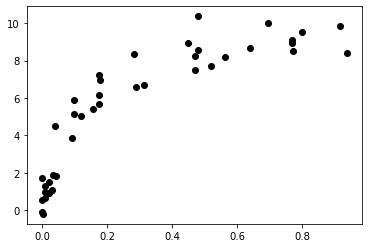

In [16]:

X_test = np.linspace(-0.1, 1.1, 500)[:, None]

plt.scatter(X.ravel(), y, color='black')
axis = plt.axis()
for degree in [1,3,5]:
    y_test = PolynomialReression(degree).fit(X,y).predict(X_test)
    plt.plot(X_test.ravel(), y_test, label='degree={0}'.format(degree))
plt.xlim(-0.1, 1.0)
plt.ylim(-2, 12)
plt.legend(loc='best')
plt.show()

## Validation Curve

In [ ]:
from sklearn.model_selection import validation_curve

In [ ]:
# degree = np.arange(21)
# train_score, val_score = validation_curve(PolynomialRegression(), X, y, 'polynomialfeature_degree', degree, cv=7)
# plt.plot(degree, np.median(train_score, 1), color='blue', label='training score')
# plt.plot(degree, np.median(val_score, 1), color='red', label='validation score')
# plt.legend(loc='best')
# plt.ylim(0,1)
# plt.xlabel('degree')
# plt.ylabel('score')

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

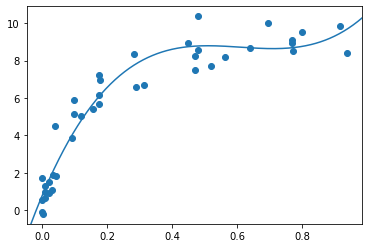

In [ ]:
plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = PolynomialRegression(3).fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)

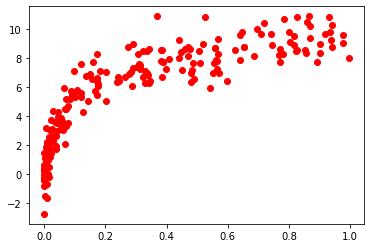

In [ ]:
X2, y2 = make_data(200)
plt.scatter(X2.ravel(), y2, color='red')

# Grid Search Cross Validation

In [20]:
from sklearn.model_selection import GridSearchCV

In [24]:
param_grid = {'polynomialfeatures__degree': np.arange(21),
                'linearregression__fit_intercept': [True, False],
                'linearregression__normalize': [True, False]}

In [25]:
grid = GridSearchCV(PolynomialRegression(), param_grid, cv=7 )

In [26]:
grid.fit(X,y)

GridSearchCV(cv=7,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('linearregression',
                                        LinearRegression())]),
             param_grid={'linearregression__fit_intercept': [True, False],
                         'linearregression__normalize': [True, False],
                         'polynomialfeatures__degree': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20])})

In [27]:
grid.best_params_

{'linearregression__fit_intercept': False,
 'linearregression__normalize': True,
 'polynomialfeatures__degree': 4}

(-0.04687651021505175,
 0.9844070023112612,
 -0.7308177116555796,
 10.902869392322714)

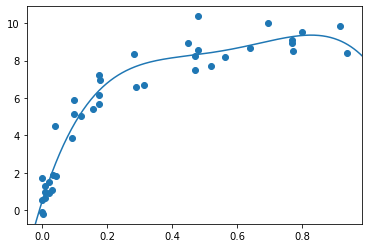

In [29]:
model = grid.best_estimator_

plt.scatter(X.ravel(), y)
lim = plt.axis()
y_test = model.fit(X, y).predict(X_test)
plt.plot(X_test.ravel(), y_test)
plt.axis(lim)